## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of one part:

1.  Variable selection

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a html file of your work. 

Good luck!


# 1. Variable selection

In our class we covered three types of feature selection techniques. They were: 
1. Filter methods
2. Wrapper methods
3. Embedded methods

Continue using the dataset 'auto_imports1.csv' from the previous homework. More specifically, use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables: you can save your created with df2.to_csv(), or you can rerun your code here. I've also attached in the homework files a df2.csv that contains the cleaned up dataset, but you still have to create the dummy variables (df2 = pd.get_dummies(df2, columns=['fuel_type'],drop_first=True). See the code bellow.

Make sure that you import the needed libraries (you can find examples on canvas).

Remember to compare your results. You can make up a table to keep track of your chosen variables (like the one bellow)


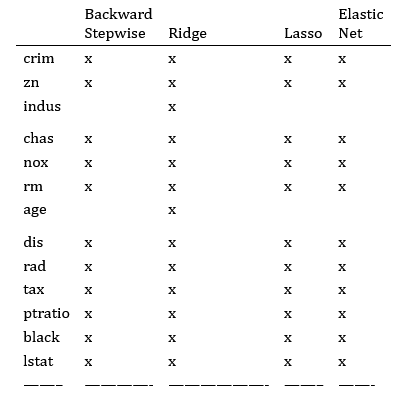



**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [40]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [41]:
#Read in data (make sure that you put it into your working directory)
df2 =pd.read_csv('df2.csv')

df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


### Get dummy variables for fuel_type within df2 drop first level

In [42]:
## Your code goes here
df2 = pd.get_dummies(df2, columns=['fuel_type'],drop_first=True)


In [43]:
df2.head()


,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450,1


In [44]:
df2.shape

(195, 15)

### 1.1. Filtered methods

Choose one (you may do more, one is required) of the filtered methods to conduct variable selection. Report your findigs

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from numpy import array 

X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]
select = SelectKBest(chi2, k=2)
z = select.fit_transform(X,y)
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', z.shape[1])

Original number of features: 14
Reduced number of features: 2


In [46]:
filter = select.get_support()

print("All features:")
print(features)
 
print("Selected best 2:")
print(features[filter])


All features:
['wheel_base' 'length' 'width' 'heights' 'curb_weight' 'engine_size'
 'bore' 'stroke' 'comprassion' 'horse_power' 'peak_rpm' 'city_mpg'
 'highway_mpg' 'price']
Selected best 2:
['peak_rpm' 'price']


In [47]:
#Now we know after doing chi-squared test between each feature and price, peak_rpm and price are best selected

### 1.2. Wrapper methods

Choose one (you may do more, one is required) of the wrapper methods to conduct variable selection. Report your findigs.

In [48]:
#Foward Selection to find 2 best features
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(LinearRegression(),
          k_features=2,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X,y)

print("Features selected: " + str(sfs.k_feature_names_))

Features selected: ('comprassion', 'highway_mpg')


In [49]:
#Doing foward selection on our data, we select comprassion and highway_mpg 

### 1.3. Embedded methods

Choose one (you may do more, one is required) of the embedded methods to conduct variable selection.Report your findigs.
<font color='red'> REMEMBER: only LASSO and Elastic Net does variable selection. Ridge only shrinks some of the coefficents but does not make them go away.</font>

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df2.iloc[:, :-1], df2.iloc[:, -1],
    test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(
    x_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(
    x_test.shape, y_test.shape))

Train data shape of X = (146, 14) and Y = (146,) : 
Test data shape of X = (49, 14) and Y = (49,) : 


In [51]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)
 
# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
 
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)
 
# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set :  0.00208580598104953
        Columns  Coefficient Estimate
0    wheel_base             -0.002682
1        length              0.002258
2         width              0.001040
3       heights              0.000954
4   curb_weight             -0.000048
5   engine_size              0.000888
6          bore             -0.025557
7        stroke             -0.060102
8   comprassion             -0.072619
9   horse_power             -0.000057
10     peak_rpm              0.000039
11     city_mpg              0.000684
12  highway_mpg              0.003410
13        price             -0.000001


In [52]:
#From the output above we can see there are few features with significance to our data, 
#stroke and comprassion

In [53]:
from sklearn.linear_model import Ridge
 
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)
 
# calculate mean square error
mse_ridge = np.mean((y_pred - y_test)**2)
print("mean square error: " + str(mse_ridge))

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

mean square error: 0.0021333968010014293
        Columns  Coefficient Estimate
0    wheel_base             -0.002729
1        length              0.002222
2         width              0.001014
3       heights              0.001037
4   curb_weight             -0.000049
5   engine_size              0.000851
6          bore             -0.017881
7        stroke             -0.052807
8   comprassion             -0.072721
9   horse_power             -0.000076
10     peak_rpm              0.000040
11     city_mpg              0.000830
12  highway_mpg              0.003250
13        price             -0.000001


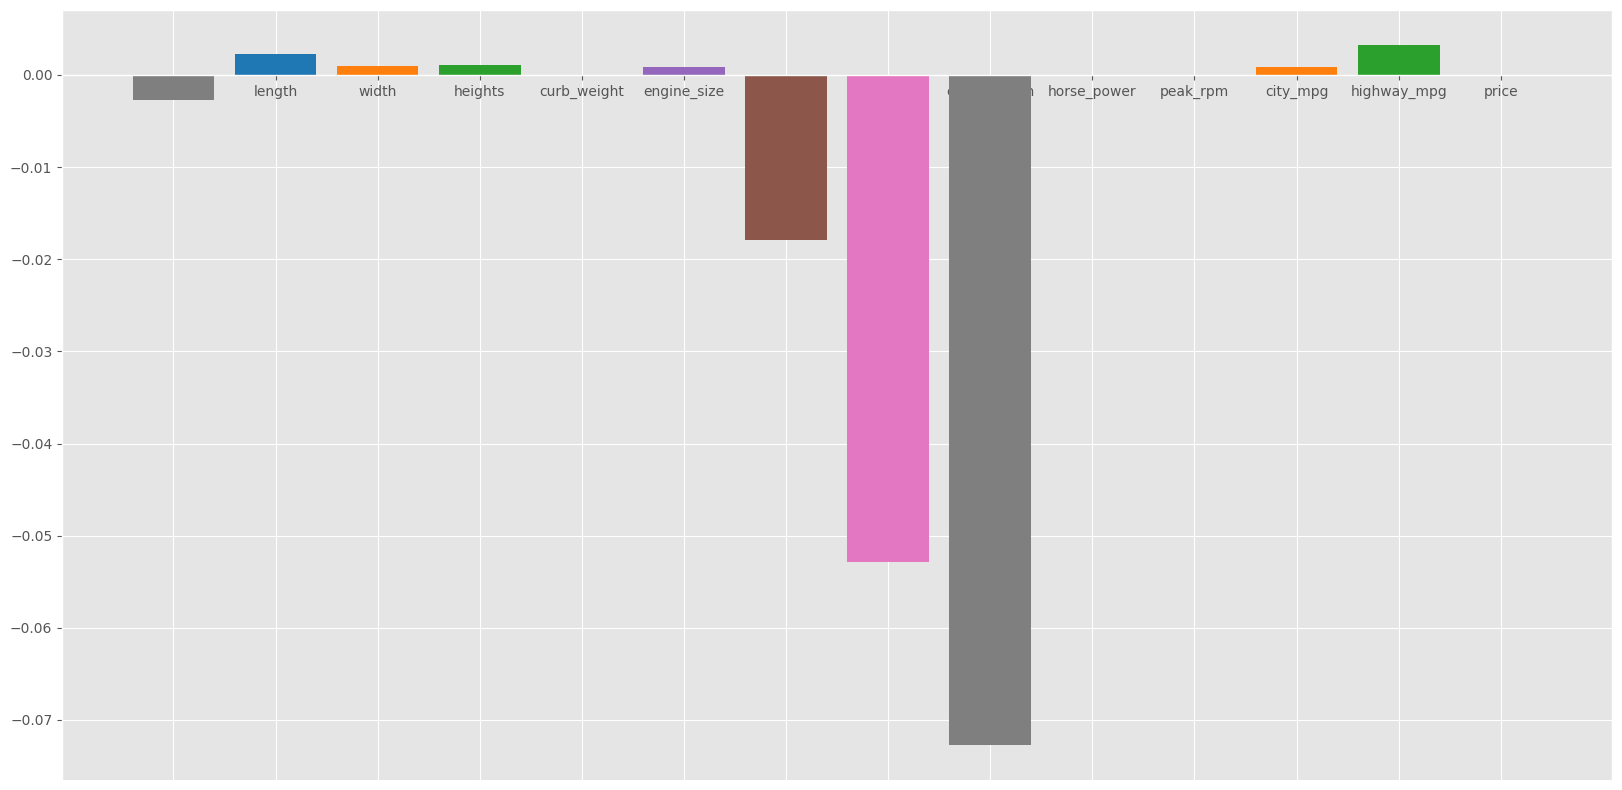

In [54]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

### 1.4. Compare your results
Compare your results from the three methods and also compare the coefficients to the full linear regression model (model1) from the previous homework.


In [39]:
#Each method seemed to get us difference answers, probably
#due to the different algorithms each method uses
#Comparing the model1 coefficents to the Ridge Regression coefficients,
#The values for both are close, although they may be scaled differently
#they then to be in the same direction

# 2. Bonus question (*extra 5 points*)
Reduce your features with PCA. Run a regression with the chosen number of PCA's, report your findings.